In [1]:
import librosa
import IPython.display as ipd # for playing the audio
import matplotlib.pyplot as plt
import librosa.display

In [4]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is E6A4-8B48

 Directory of C:\Users\HP\Audio Processing

09-12-2023  21:21    <DIR>          .
09-12-2023  19:49    <DIR>          ..
09-12-2023  21:21    <DIR>          .ipynb_checkpoints
09-12-2023  21:21        43,502,484 Audio Processing.ipynb
09-12-2023  21:21                72 Beat Retrival from Music.ipynb
09-12-2023  19:54         6,796,585 bensound-riddledwitherrors.mp3
09-12-2023  21:14        24,915,500 temp_file_1.wav
09-12-2023  21:15        37,373,228 temp_file_48000.wav
               5 File(s)    112,587,869 bytes
               3 Dir(s)  70,486,614,016 bytes free


In [16]:
wave_x, sample_rate = librosa.load('bensound-breath.mp3') # loading the audio file into juypter notebook
ipd.Audio(wave_x, rate= sample_rate)

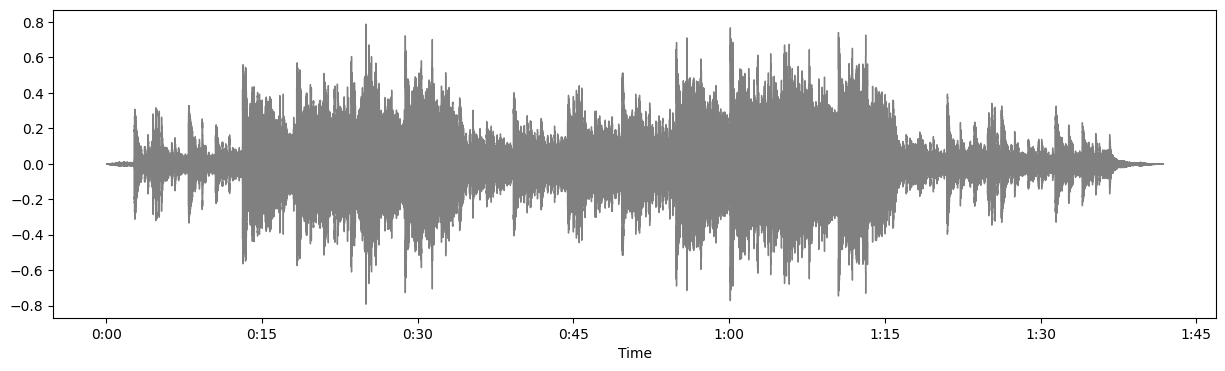

In [17]:
plt.figure(figsize=(15,4), facecolor=(1,1,1)) # defining the plot size
librosa.display.waveshow(wave_x, sr= sample_rate, color='gray') # we are passing the array, sample rate, colour of the graph

In [18]:
x = librosa.stft(wave_x)
xdb = librosa.amplitude_to_db(abs(x))

The range of perceivable sound pressure is very wide, from around 20 μPa (micro Pascal) to 20 Pa, a ratio of 1 million. Furthermore the human perception of sound levels is not linear, but better approximated by a logarithm.

By converting to decibels (dB) the scale becomes logarithmic. This limits the numerical range, to something like 0-120 dB instead. The intensity of colors when this is plotted corresponds more closely to what we hear than if one used a linear scale.

Note that the reference (0 dB) point in decibels can be chosen freely. The default for librosa.amplitude_to_db is to compute numpy.max, meaning that the max value of the input will be mapped to 0 dB. All other values will then be negative. The function also applies a threshold on the range of sounds, by default 80 dB. So anything lower than -80 dB will be clipped -80 dB.

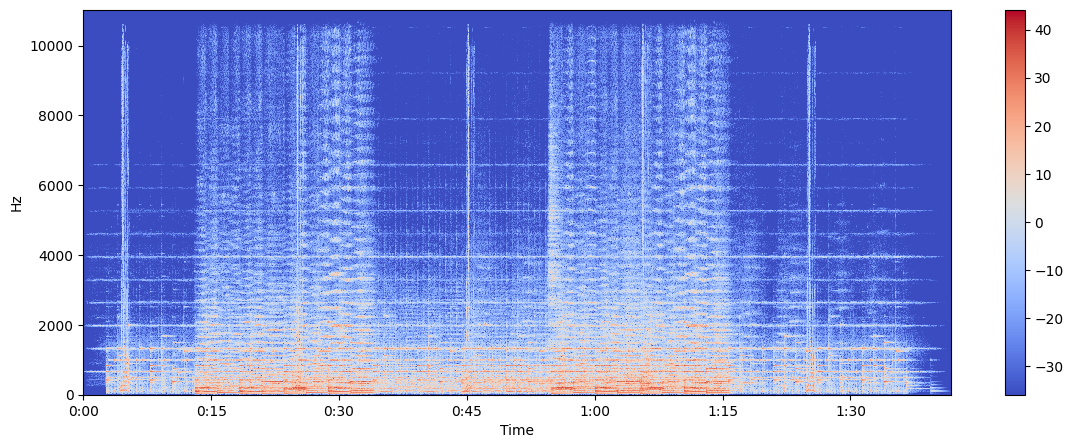

In [19]:
plt.figure(figsize=(14,5))
librosa.display.specshow(xdb, sr= sample_rate, x_axis='time', y_axis='hz')
plt.colorbar()

In [25]:
tempo, beat_frames = librosa.beat.beat_track(y=wave_x, sr=sample_rate)
print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

Estimated tempo: 92.29 beats per minute


In [26]:
# Converting the frame indices of beat events into timestamps
beat_times = librosa.frames_to_time(beat_frames, sr=sample_rate) 

In [27]:
print(beat_times)

[ 2.02013605  2.67029478  3.34367347  3.9938322   4.64399093  5.24770975
  5.92108844  6.59446712  7.24462585  7.89478458  8.54494331  9.218322
  9.86848073 10.51863946 11.16879819 11.81895692 12.46911565 13.11927438
 13.81587302 14.46603175 15.11619048 15.74312925 16.39328798 17.02022676
 17.67038549 18.34376417 18.9939229  19.64408163 20.31746032 20.96761905
 21.59455782 22.24471655 22.89487528 23.54503401 24.19519274 24.84535147
 25.51873016 26.16888889 26.81904762 27.46920635 28.11936508 28.76952381
 29.44290249 30.06984127 30.72       31.39337868 32.04353741 32.69369615
 33.34385488 33.99401361 34.64417234 35.29433107 35.9444898  36.59464853
 37.26802721 37.91818594 38.56834467 39.2185034  39.86866213 40.51882086
 41.16897959 41.81913832 42.46929705 43.11945578 43.76961451 44.4429932
 44.97705215 45.7200907  46.39346939 47.04362812 47.69378685 48.34394558
 48.99410431 49.64426304 50.29442177 50.9445805  51.61795918 52.26811791
 52.91827664 53.56843537 54.2185941  54.86875283 55.51

Timestamps where beats occured in the audio file

In [28]:
print(beat_times.shape)

(144,)


(-1.0, 1.0)

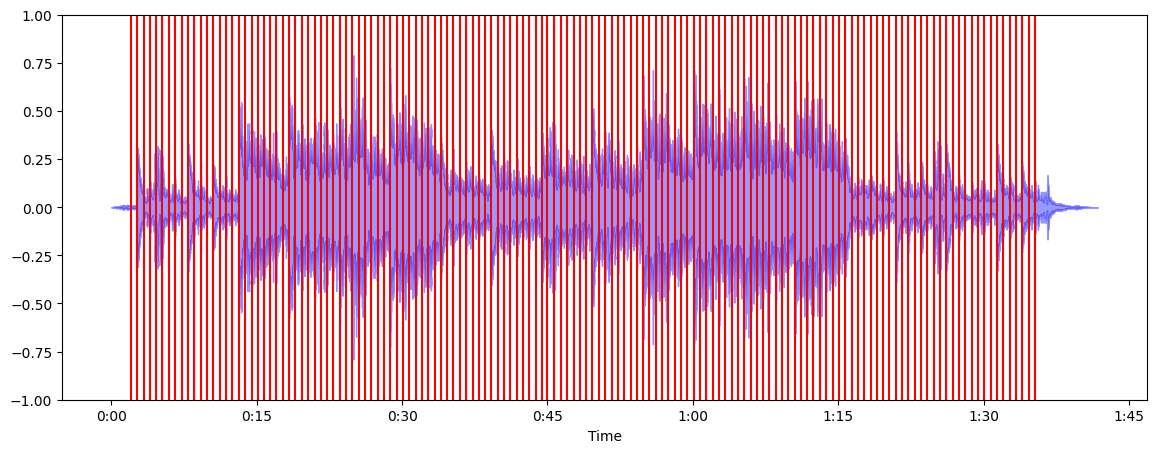

In [31]:
plt.figure(figsize=(14,5))
librosa.display.waveshow(wave_x, alpha=0.4, color='b')
plt.vlines(beat_times, -1,1, color='r')
plt.ylim(-1,1)

### This shows how the beats look like if u want to see

In [32]:
from ipywidgets import interact

In [33]:
def f(start_bpm, tightness_exp):
    return librosa.beat.beat_track(wave_x, sr=sample_rate, start_bpm= start_bpm, tightness =10**tightness_exp, units='time')

In [37]:
interact(f, start_bpm=10, tightness_exp=2)

interactive(children=(IntSlider(value=10, description='start_bpm', max=30, min=-10), IntSlider(value=2, descri…

<function __main__.f(start_bpm, tightness_exp)>

In [36]:
# we can can change them, and it generates a different array and then save and the plot again!